# Autoencoders using HE to IHC


In [1]:
pwd


'C:\\Users\\PG LAB\\Downloads'

In [2]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.autograd import Variable
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import torch.nn.functional as F
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt

C:\Users\PG LAB\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

#The encoder part of the autoencoder is defined as a sequence of convolutional layers followed by ReLU activation functions. 
# The input to the encoder is a 3-channel image (nn.Conv2d(3, 64, ...)) and it gradually reduces the spatial dimensions while 
# increasing the number of channels. 
# The kernel_size, stride, and padding parameters control the behavior of the convolutional layers.
# Spatial dimensions refer to the dimensions(height and width) associated with the spatial structure of data, such as images. 
# In the context of computer vision, spatial dimensions typically refer to the height and width of an image.
        
    # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.ReLU()   #f(x) = max(0, x) # Rectified Linear Unit (ReLU) is an activation function commonly used in neural networks.
        )
# By reducing the spatial dimensions in the encoder part of the autoencoder and then increasing them in the decoder part, 
# the model learns to compress the input image into a lower-dimensional representation 
# and then reconstruct the image from that representation.

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoding = self.encoder(x)
        decoding = self.decoder(encoding)
        return decoding
    
# The forward method defines the forward pass of the autoencoder. 
# It takes an input x and passes it through the encoder to obtain the encoded representation (encoding). 
# Then, it passes the encoding through the decoder to obtain the reconstructed output (decoding), which is returned as the
# final output of the autoencoder.

In [5]:
# Define the paths to the input image folders of training dataset
folder1_path= "C:/Users/PG LAB/Desktop/A1"  #HE training
folder2_path = "C:/Users/PG LAB/Desktop/B1" #IHC training

In [6]:
# Define the output folder path
output_folder_path ="C:/Users/PG LAB/Desktop/AB"

In [7]:
# Ensure the output folder exists
os.makedirs(output_folder_path, exist_ok=True)

# Get the list of image file names from folder 1
folder1_images = os.listdir(folder1_path)

# Iterate over the images in folder 1
for image_name in folder1_images:
    # Read the image from folder 1
    image1 = cv2.imread(os.path.join(folder1_path, image_name)) #loop folder=image_name

    # Check if a corresponding image exists in folder 2
    image2_path = os.path.join(folder2_path, image_name)
    if not os.path.isfile(image2_path):
        continue

    # Read the image from folder 2
    image2 = cv2.imread(image2_path)

    # Concatenate the images horizontally
    concatenated_image = np.concatenate((image1, image2), axis=1) #cols

    # Generate the output image path
    output_image_path = os.path.join(output_folder_path, image_name)

    # Save the concatenated image
    cv2.imwrite(output_image_path, concatenated_image)
    
# It ensures that the output folder specified by output_folder_path exists. If the folder does not exist, it creates it using os.makedirs().

# It obtains the list of image file names in folder1_path using os.listdir() and assigns them to the variable folder1_images.

# It iterates over each image file name in folder1_images using a for loop.

# Inside the loop, it reads the image corresponding to the current file name from folder1_path using cv2.imread(). The image is assigned to the variable image1.

# It constructs the path to the corresponding image in folder2_path by joining folder2_path with the current image file name using os.path.join(). The resulting path is assigned to the variable image2_path.

# It checks if a file exists at image2_path using os.path.isfile(). If the file does not exist, the loop moves to the next iteration using the continue statement.

# If the file exists, it reads the image from image2_path using cv2.imread() and assigns it to the variable image2.

# It horizontally concatenates image1 and image2 using np.concatenate() with axis=1.
# The resulting concatenated image is assigned to the variable concatenated_image.

# It generates the output image path by joining output_folder_path with the current image file name using os.path.join(). 
# The resulting path is assigned to the variable output_image_path.

# It saves the concatenated image concatenated_image to the path specified by output_image_path using cv2.imwrite().

In [8]:
folder3_path= "C:/Users/PG LAB/Desktop/A2" #Testing HE 
folder4_path = "C:/Users/PG LAB/Desktop/B2"#Testing IHC

In [9]:
# Define the output folder path
output1_folder_path ="C:/Users/PG LAB/Desktop/BA"

In [10]:
# Ensure the output folder exists #OS module in Python provides functions for interacting with the operating system. 
os.makedirs(output1_folder_path, exist_ok=True)

# Get the list of image file names from folder 3
folder3_images = os.listdir(folder3_path)

# Iterate over the images in folder 3
for image1_name in folder3_images:
    # Read the image from folder 3
    image3 = cv2.imread(os.path.join(folder3_path, image1_name))

    # Check if a corresponding image exists in folder 2
    image4_path = os.path.join(folder4_path, image1_name)
    if not os.path.isfile(image4_path):
        continue

    # Read the image from folder 4
    image4 = cv2.imread(image4_path)

    # Concatenate the images horizontally
    concatenated1_image = np.concatenate((image3, image4), axis=1)

    # Generate the output image path
    output1_image_path = os.path.join(output1_folder_path, image1_name)

    # Save the concatenated image
    cv2.imwrite(output1_image_path, concatenated1_image)

In [27]:
# Hyperparameters
num_epochs = 200   #epoch refers to a single pass of the entire training dataset 
batch_size = 64
learning_rate = 0.001  #the rate at which a model adjusts its parameters during the training process.

# Image transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load the dataset
train_set = torchvision.datasets.ImageFolder('C:/Users/PG LAB/Desktop/HI', transform=transform)
train_loader = torch.utils.data.DataLoader(train_set , batch_size=batch_size, shuffle=True)


In [28]:
test_set = torchvision.datasets.ImageFolder('C:/Users/PG LAB/Desktop/IH', transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [29]:
# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [30]:
# Initialize the model
#gradients are used to update the model parameters during the training process.
model = Autoencoder()

# To train a model, we need a loss function and an optimizer

criterion = nn.MSELoss() #The MSE is a non-negative value, and a lower MSE indicates better model performance, as it means the predicted values are closer to the true values.
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop

for epoch in range(num_epochs):
    for data in train_loader:
        imgn, _ = data
        imgn = Variable(imgn)

        # Forward pass
        output = model(imgn)
        loss = criterion(output, imgn)   #calculates the mean squared error loss between output and imgn

        # Backward pass and optimization #avoid noise
        optimizer.zero_grad()   # zero out the gradient buffers of the optimizer   
        loss.backward()     #gradients of the model parameters with respect to the loss are calculated
        optimizer.step()     #optimizer updates the model parameters
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}")

Epoch [1/200], Training Loss: 0.0259
Epoch [2/200], Training Loss: 0.0123
Epoch [3/200], Training Loss: 0.0106
Epoch [4/200], Training Loss: 0.0067
Epoch [5/200], Training Loss: 0.0054
Epoch [6/200], Training Loss: 0.0051
Epoch [7/200], Training Loss: 0.0050
Epoch [8/200], Training Loss: 0.0044
Epoch [9/200], Training Loss: 0.0036
Epoch [10/200], Training Loss: 0.0039
Epoch [11/200], Training Loss: 0.0031
Epoch [12/200], Training Loss: 0.0034
Epoch [13/200], Training Loss: 0.0038
Epoch [14/200], Training Loss: 0.0027
Epoch [15/200], Training Loss: 0.0029
Epoch [16/200], Training Loss: 0.0029
Epoch [17/200], Training Loss: 0.0035
Epoch [18/200], Training Loss: 0.0026
Epoch [19/200], Training Loss: 0.0039
Epoch [20/200], Training Loss: 0.0033
Epoch [21/200], Training Loss: 0.0029
Epoch [22/200], Training Loss: 0.0034
Epoch [23/200], Training Loss: 0.0026
Epoch [24/200], Training Loss: 0.0023
Epoch [25/200], Training Loss: 0.0029
Epoch [26/200], Training Loss: 0.0025
Epoch [27/200], Train

In [31]:
# Test the autoencoder

model.eval()

test_loss = 0.0
#avoid gradient
with torch.no_grad():   #PyTorch does not track the operations for computing gradients
    
    for data in test_loader:
        imgn, _ = data
    
        reconstructions = model(imgn)
        
        loss = criterion(reconstructions, imgn)
        test_loss += loss.item() * imgn.size(0) #returns the batch size of the current batch.
        test_loss /= len(test_loader.dataset) #obtain the average test loss.

print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0001


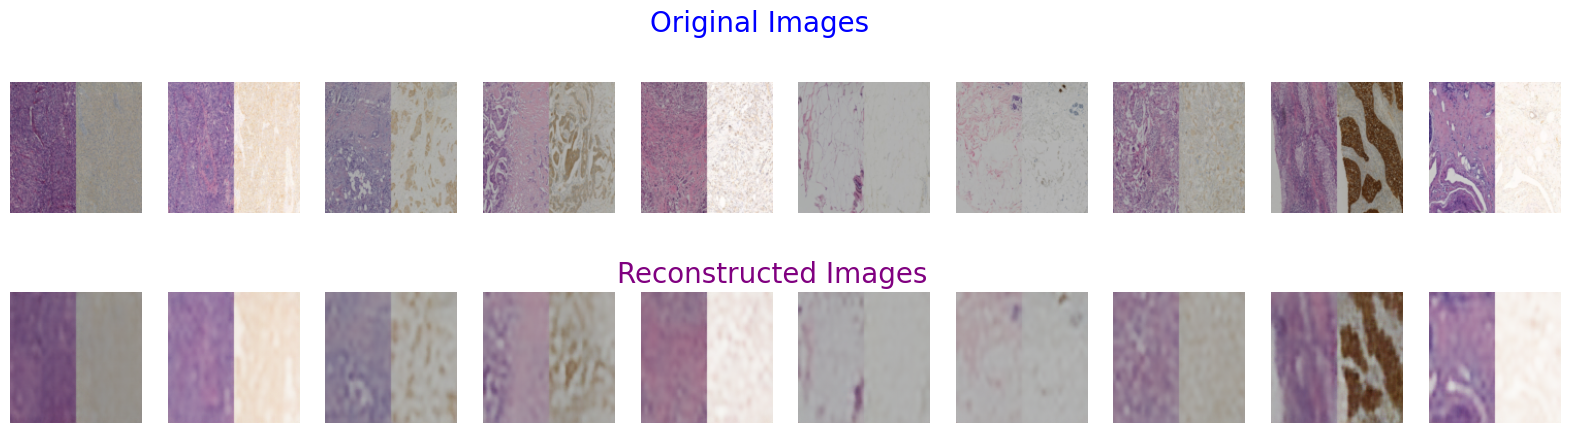

In [36]:
# Plot the original and reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20, 5))
for i in range(10):
    axes[0][i].imshow(imgn[i].permute(1, 2, 0))
    axes[0][i].axis('off')  #are used to turn off the axis labels and ticks
    plt.suptitle('Original Images', fontsize = 20, color = "Blue")
    axes[1][i].imshow(reconstructions[i].permute(1, 2, 0))
    axes[1][i].axis('off')
    plt.title('Reconstructed Images',fontsize = 20, color = "Purple").set_position([-5, -5])
plt.show()


In [33]:
# Save the trained model
torch.save(model, 'aenew_model.pt')

In [34]:
#torch.save(model, PATH)
model = torch.load('aenew_model.pt')
model.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): Sigmoid()
  )
)